<a href="https://colab.research.google.com/github/Statistically-Inclined/NLP-Tutorial/blob/main/Approach_all_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [7]:
df_train = pd.read_csv('twitter_training.csv', header=None)
df_test = pd.read_csv('twitter_validation.csv', header=None)

In [8]:
df_train.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [9]:
df_test.head()

,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [10]:
df = df_train.append(df_test)
df.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [11]:
df.shape

(75682, 4)

In [12]:
df.drop([0,1], axis=1, inplace=True)
df.head()

,2,3
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [13]:
df.rename(columns={2:'label', 3:'text'}, inplace=True)
df.head()

,label,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [14]:
df.label.unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [15]:
df.isnull().sum()

label      0
text     686
dtype: int64

In [16]:
df.dropna(axis=0, inplace=True)
df.isnull().sum()

label    0
text     0
dtype: int64

In [17]:
df.tail()

,label,text
995,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,Positive,Today sucked so it’s time to drink wine n play...
998,Positive,Bought a fraction of Microsoft today. Small wins.
999,Neutral,Johnson & Johnson to stop selling talc baby po...


### NLP Data Cleaning

In [18]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

string.punctuation
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [19]:
def clean_content(message):
    message = message.lower()
    message = re.sub(r'[^A-Za-z\']', ' ', message)
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    final_sentence = ' '.join(Test_punc_removed_join_clean)
    return final_sentence

In [20]:
df['cleaned_text'] = df['text'].apply(clean_content)

In [21]:
df.tail()

,label,text,cleaned_text
995,Irrelevant,⭐️ Toronto is the arts and culture capital of ...,toronto arts culture capital canada wonder wan...
996,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,actually good move tot bring viewers one peopl...
997,Positive,Today sucked so it’s time to drink wine n play...,today sucked time drink wine n play borderland...
998,Positive,Bought a fraction of Microsoft today. Small wins.,bought fraction microsoft today small wins
999,Neutral,Johnson & Johnson to stop selling talc baby po...,johnson johnson stop selling talc baby powder ...


### Data Splitting

In [22]:
X = df['cleaned_text'].values
y = df['label'].values

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,  random_state=1234, shuffle=True)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((59996,), (15000,), (59996,), (15000,))

### Implementing TF-IDF

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer(min_df=3,  max_features=None, strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1, 3), use_idf=1, smooth_idf=1, sublinear_tf=1, stop_words='english')

In [26]:
vectorizer_tfidf.fit(X_train)

TfidfVectorizer(min_df=3, ngram_range=(1, 3), smooth_idf=1,
                stop_words='english', strip_accents='unicode', sublinear_tf=1,
                token_pattern='\\w{1,}', use_idf=1)

In [27]:
X_train_tf = vectorizer_tfidf.transform(X_train)
X_test_tf = vectorizer_tfidf.transform(X_test)

In [28]:
X_train_tf.shape, X_test_tf.shape

((59996, 156362), (15000, 156362))

### Implementing Count Vectorizer

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_cv = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1, 3), stop_words='english')

In [30]:
vectorizer_cv.fit(X_train)

CountVectorizer(ngram_range=(1, 3), stop_words='english',
                token_pattern='\\w{1,}')

In [31]:
X_train_cv = vectorizer_cv.transform(X_train)
X_test_cv = vectorizer_cv.transform(X_test)

In [32]:
X_train_cv.shape, X_test_cv.shape

((59996, 533346), (15000, 533346))

### Implementing Standard Scaling

In [33]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler(with_mean=False)

In [34]:
X_train_tf_scaled = scale.fit_transform(X_train_tf)
X_test_tf_scaled = scale.transform(X_test_tf)

In [35]:
X_train_cv_scaled = scale.fit_transform(X_train_cv)
X_test_cv_scaled = scale.transform(X_test_cv)

### Implementing Principle Component Analysis (PCA) for Dimensionality Reduction
PCA is not allowed in sparse matrices, therefore, we are using Truncated SVD for Dimensionality Reduction 

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=200)

In [37]:
# pca.fit(X_train_tf)
# X_train_svd = pca.transform(X_train_cv)
# X_test_svd = pca.transform(X_test_cv)

### Implementing Truncated Singular Value Decomposition (SVD) for Dimensionality Reduction
**Defining:** Truncated SVD generates the matrices with the specified number of columns, whereas SVD outputs n columns of matrices. It decreases the number of output and better works on the sparse matrices for features output.

**Defining:** Singular Value Decomposition (SVD) is a widely used technique to decompose a matrix into several component matrices, exposing many of the useful and interesting properties of the original matrix.

**Understanding:** This transformer performs linear dimensionality reduction by means of truncated singular value decomposition (SVD). Contrary to PCA, this estimator does not center the data before computing the singular value decomposition. This means it can work with sparse matrices efficiently.


In [38]:
# Apply Truncated SVD, I chose 120 components. 120-200 components are good enough for SVM model.
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=120)

In [39]:
svd.fit(X_train_cv)
X_train_cv_svd = svd.transform(X_train_cv)
X_test_cv_svd = svd.transform(X_test_cv)

In [40]:
svd.fit(X_train_tf)
X_train_tf_svd = svd.transform(X_train_tf)
X_test_tf_svd = svd.transform(X_test_tf)

### Model Evaluation Method

In [42]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, make_scorer

def model_evaluation(x, y, model):
  x_pred = model.predict(x)
  cm = confusion_matrix(y, x_pred)
  report = classification_report(y, x_pred)
  score = accuracy_score(y, x_pred)
  print("\nReport: \n", report)
  print("\nAccuracy Score: ", score)
  print("\nConfusion matrix: \n", cm)
  #plt.figure(figsize=(10,7))
  #sns.heatmap(cm, annot=True, fmt='g')

### Model Building Method

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import xgboost

def model_build(X_train, y_train, X_test, y_test):

  # Logistic Regression Model
  model_LR = LogisticRegression( C=1.0, solver='lbfgs', penalty='l2', fit_intercept=True )
  model_LR.fit(X_train, y_train)
  print("\n\nLogistic Regression: ", model_LR)
  model_evaluation(X_test, y_test, model_LR)

  # Naive Bayes Model
  model_NB = MultinomialNB()
  model_NB.fit(X_train, y_train)
  print("\n\nNaive Bayes: ", model_NB)
  model_evaluation(X_test, y_test, model_NB)

  # Support Vector Machine with standard scaled data (must)
  model_SVC = SVC(C=1.0, probability=True) # since we need probabilities
  model_SVC.fit(X_train, y_train)
  print("\n\nSupport Vector Classifier: ", model_SVC)
  model_evaluation(X_test, y_test, model_SVC)

  # XGBoost Model
  model_XGB = xgboost.XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.8, subsample=0.8, nthread=10, learning_rate=0.1)
  model_XGB.fit(X_train, y_train)
  print("\n\nXGBoosting: ",model_XGB)
  model_evaluation(X_test, y_test, model_XGB)

In [44]:
# model_build(X_train_cv, y_train, X_test_cv, y_test)

### Pipeline Technique

In [45]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline

In [47]:
# Initialize Truncated SVD
svd = TruncatedSVD(n_components=120)
    
# Initialize the standard scaler 
scale = StandardScaler()

# Initialize the Logistic Regression
model_LR = LogisticRegression()

# Create the pipeline 
classifier_LR = Pipeline( [ ('svd', svd), ('sc', scale), ('lr', model_LR) ] )

In [48]:
classifier_LR.fit(X_train_tf, y_train)

Pipeline(steps=[('svd', TruncatedSVD(n_components=120)),
                ('sc', StandardScaler()), ('lr', LogisticRegression())])

In [52]:
model_evaluation(X_test_tf, y_test, classifier_LR)


Report: 
               precision    recall  f1-score   support

  Irrelevant       0.35      0.21      0.27      2609
    Negative       0.56      0.68      0.61      4525
     Neutral       0.52      0.50      0.51      3679
    Positive       0.54      0.58      0.56      4187

    accuracy                           0.52     15000
   macro avg       0.50      0.49      0.49     15000
weighted avg       0.51      0.52      0.51     15000


Accuracy Score:  0.5249333333333334

Confusion matrix: 
 [[ 559  794  475  781]
 [ 355 3057  568  545]
 [ 297  837 1841  704]
 [ 378  768  624 2417]]


### Grid Search Technique

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
# Initialize the Naive-Bayes model
model_NB = MultinomialNB()

# parameter grid
parameters = { 'alpha': [0.001, 0.01, 0.1, 1, 10, 100], 'fit_prior': [True, False]}

In [55]:
# Initialize Grid Search Model
model_NB_Grid = GridSearchCV(estimator=model_NB, param_grid=parameters, scoring=None, verbose=True, n_jobs=-1, refit=True, cv=2)

# Fit Grid Search Model
model_NB_Grid.fit(X_train_cv, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


GridSearchCV(cv=2, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                         'fit_prior': [True, False]},
             verbose=True)

In [56]:
print("Best score:", model_NB_Grid.best_score_)
print("Best parameters set:")

best_parameters = model_NB_Grid.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print(param_name, "=", best_parameters[param_name])

Best score: 0.8771084738982599
Best parameters set:
alpha = 0.001
fit_prior = True


In [57]:
model_evaluation(X_test_cv, y_test, model_NB_Grid)


Report: 
               precision    recall  f1-score   support

  Irrelevant       0.95      0.90      0.93      2609
    Negative       0.89      0.96      0.92      4525
     Neutral       0.95      0.91      0.93      3679
    Positive       0.93      0.92      0.93      4187

    accuracy                           0.93     15000
   macro avg       0.93      0.92      0.93     15000
weighted avg       0.93      0.93      0.93     15000


Accuracy Score:  0.9268666666666666

Confusion matrix: 
 [[2358  114   46   91]
 [  38 4344   59   84]
 [  27  204 3348  100]
 [  55  220   59 3853]]


# Pipeline and Grid Search Technique

### Grid Search Technique for Logistic Regression

In [58]:
# Initialize Truncated SVD for Dimensionality Reduction
svd = TruncatedSVD(n_components=120)
    
# Initialize the standard scaler 
scale = StandardScaler()

# Initialize the Logistic Regression
model_LR = LogisticRegression()

# Create the pipeline 
classifier_LR = Pipeline( [ ('svd', svd), ('sc', scale), ('lr', model_LR) ] )

# Classifier Parameters ["__" for pointing/joining the "svd" or "lr" parameter]
parameters = {'svd__n_components':[120, 180], 'lr__C':[0.1, 1.0, 10], 'lr__penalty':['l1', 'l2']}

In [59]:
# Initialize Grid Search Model
model_LR = GridSearchCV( estimator = classifier_LR, param_grid = parameters, scoring = None, verbose = 2, n_jobs = -1, refit = True, cv = 2 )

# Fit Grid Search Model
model_LR.fit(X_train_cv, y_train)

In [62]:
print("Best score:", model_LR.best_score_)
print("Best parameters set:")

best_parameters = model_LR.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print(param_name, "=", best_parameters[param_name])

### Grid Search for Naive Bayes

In [63]:
from sklearn.preprocessing import MinMaxScaler

# Initialize Truncated SVD for Dimensionality Reduction
svd = TruncatedSVD()

# Normalization for the Data
scale_minmax = MinMaxScaler()
    
# # Initialize the Naive-Bayes model
model_NB = MultinomialNB()

# Create the pipeline 
classifier_NB = Pipeline( [ ('svd', svd),  ('sc', scale_minmax ), ('nb', model_NB) ] )

# parameter grid ["__" for pointing the "svd" or "nb"]
parameters = { 'svd__n_components': [20, 40], 'nb__alpha': [0.001, 0.01, 0.1, 1, 10, 100], 'nb__fit_prior': [True, False] }

In [65]:
# Initialize Grid Search Model
model_NB = GridSearchCV(estimator = classifier_NB, param_grid = parameters, scoring = None, verbose=10, n_jobs=-1, refit = True, cv=2)

# Fit Grid Search Model
model_NB.fit(X_train_cv, y_train)  # we can use the full data here but im only using X_train. 

In [66]:
print("Best score:", model_NB.best_score_)
print("Best parameters set:")

best_parameters = model_NB.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print(param_name, "=", best_parameters[param_name])

In [67]:
model_evaluation(X_test_cv, y_test, model_NB)

# **Deep Learning**

In [68]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

In [69]:
y_train

array(['Positive', 'Neutral', 'Irrelevant', ..., 'Positive', 'Neutral',
       'Positive'], dtype=object)

In [70]:
np.array(y_train)

array(['Positive', 'Neutral', 'Irrelevant', ..., 'Positive', 'Neutral',
       'Positive'], dtype=object)

In [71]:
# Binarize the 'label' for the Neural Network
# In simply words, One-Hot-Encoding

# Label Encoding (y_train should be in array format)
# y_train = np.array(y_train)
label_encoder = LabelEncoder()
y_train_le = label_encoder.fit_transform(y_train)
y_test_le = label_encoder.transform(y_test)

# One Hot Encoding (from label encoding)
y_train_encoded = np_utils.to_categorical(y_train_le)
y_test_encoded = np_utils.to_categorical(y_test_le)

In [72]:
y_train_le

array([3, 2, 0, ..., 3, 2, 3])

In [73]:
y_train_encoded

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)

### Simple ANN Model
**Batch** **Normalization**: 
1. Batch normalization solves a major problem called internal covariate shift. 
2. It serves to speed up training and use higher learning rates, making learning easier.

In [74]:
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers.core import Dense, Activation, Dropout

In [75]:
X_train_tf_scaled.shape, y_train_encoded.shape, X_test_tf_scaled.shape, y_test_encoded.shape

((59996, 156362), (59996, 4), (15000, 156362), (15000, 4))

In [76]:
X_train_tf_svd.shape, y_train_encoded.shape, X_test_tf_svd.shape, y_test_encoded.shape

((59996, 120), (59996, 4), (15000, 120), (15000, 4))

In [77]:
# Initialize the model
model = Sequential()

# Adding Input Layer with Dropout and Normalization
model.add(Dense(300, input_dim=120, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Adding Hidden Layer with Dropout and Normalization
model.add(Dense(300, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

# Adding Output Layer 
model.add(Dense(4))
model.add(Activation('softmax'))

In [78]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ["accuracy"])

In [79]:
# Summary of the Network
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               36300     
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 batch_normalization (BatchN  (None, 300)              1200      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 300)              1200      
 hNormalization)                                        

In [80]:
model.fit(X_train_tf_svd, y_train_encoded, batch_size=64, epochs=10, verbose=True, validation_data=(X_test_tf_svd, y_test_encoded))

Epoch 1/10
938/938 [==============================] - 9s 8ms/step - loss: 1.2046 - accuracy: 0.4858 - val_loss: 1.0675 - val_accuracy: 0.5466
Epoch 2/10
938/938 [==============================] - 12s 13ms/step - loss: 1.0743 - accuracy: 0.5362 - val_loss: 1.0277 - val_accuracy: 0.5634
Epoch 3/10
938/938 [==============================] - 14s 15ms/step - loss: 1.0331 - accuracy: 0.5551 - val_loss: 1.0154 - val_accuracy: 0.5679
Epoch 4/10
938/938 [==============================] - 13s 14ms/step - loss: 1.0001 - accuracy: 0.5716 - val_loss: 0.9827 - val_accuracy: 0.5858
Epoch 5/10
938/938 [==============================] - 7s 8ms/step - loss: 0.9651 - accuracy: 0.5882 - val_loss: 0.9496 - val_accuracy: 0.6025
Epoch 6/10
938/938 [==============================] - 7s 7ms/step - loss: 0.9380 - accuracy: 0.6029 - val_loss: 0.9137 - val_accuracy: 0.6195
Epoch 7/10
938/938 [==============================] - 7s 7ms/step - loss: 0.9078 - accuracy: 0.6152 - val_loss: 0.8972 - val_accuracy: 0.6219


In [82]:
loss, score = model.evaluate(X_test_tf_svd, y_test_encoded)
print("Loss: ", loss)
print("Score: ", score)

469/469 [==============================] - 2s 4ms/step - loss: 0.8399 - accuracy: 0.6570
Loss:  0.8398961424827576
Score:  0.6570000052452087


In [87]:
y_pred = model.predict(X_test_tf_svd)
y_pred

array([[1.0989286e-03, 3.4846738e-02, 3.7338339e-02, 9.2671597e-01],
       [4.8594154e-02, 6.9090974e-01, 6.5625325e-02, 1.9487076e-01],
       [3.6966342e-02, 8.2681412e-01, 2.1595383e-02, 1.1462428e-01],
       ...,
       [6.2312037e-02, 2.2898174e-03, 9.0351129e-01, 3.1886850e-02],
       [1.9161812e-04, 9.5530771e-02, 8.1193075e-03, 8.9615828e-01],
       [4.7735092e-01, 4.8431996e-03, 1.7319717e-01, 3.4460872e-01]],
      dtype=float32)

"argmax()" is used for converting One-Hot-Encoding to Label-Encoding

In [89]:
y_pred_argmax = np.argmax(y_pred, axis=1)
y_pred_argmax

array([3, 1, 1, ..., 2, 3, 0])

In [91]:
y_test_le

array([3, 1, 1, ..., 2, 3, 3])

In [93]:
confusion_matrix(y_test_le, y_pred_argmax)

array([[1179,  589,  231,  610],
       [ 174, 3551,  263,  537],
       [ 259,  654, 2058,  708],
       [ 264,  580,  276, 3067]])

In [95]:
print(classification_report(y_test_le, y_pred_argmax))

              precision    recall  f1-score   support

           0       0.63      0.45      0.53      2609
           1       0.66      0.78      0.72      4525
           2       0.73      0.56      0.63      3679
           3       0.62      0.73      0.67      4187

    accuracy                           0.66     15000
   macro avg       0.66      0.63      0.64     15000
weighted avg       0.66      0.66      0.65     15000



In [103]:
print(accuracy_score(y_test_le, y_pred_argmax)*100, "%")

65.7 %


In [100]:
# For multi-labelled target values

def model_evaluation_ann(x, y, model):
  y_pred = model.predict(x)
  y_pred_argmax = np.argmax(y_pred, axis=1)
  cm = confusion_matrix(y, y_pred_argmax)
  report = classification_report(y, y_pred_argmax)
  score = accuracy_score(y, y_pred_argmax)
  print("\nReport: \n", report)
  print("\nAccuracy Score: ", score)
  print("\nConfusion matrix: \n")
  plt.figure(figsize=(10,7))
  sns.heatmap(cm, annot=True, fmt='g')


Report: 
               precision    recall  f1-score   support

           0       0.63      0.45      0.53      2609
           1       0.66      0.78      0.72      4525
           2       0.73      0.56      0.63      3679
           3       0.62      0.73      0.67      4187

    accuracy                           0.66     15000
   macro avg       0.66      0.63      0.64     15000
weighted avg       0.66      0.66      0.65     15000


Accuracy Score:  0.657

Confusion matrix: 



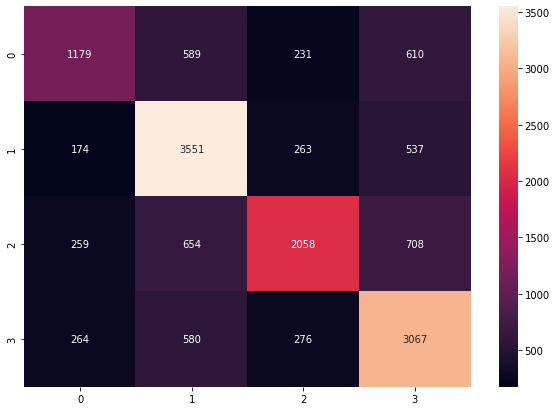

In [101]:
model_evaluation_ann(X_test_tf_svd, y_test_le, model)

### LSTM RNN Model

In [104]:
from keras.preprocessing import sequence, text

# Using keras tokenizer here
token = text.Tokenizer(num_words=None)
max_len = 120 # Same as SVD used

# Tokenizing to the Data
token.fit_on_texts(list(X_train) + list(X_test))
X_train_seq = token.texts_to_sequences(X_train)
X_test_seq = token.texts_to_sequences(X_test)

# Zero padding to the sequences
X_train_pad = sequence.pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = sequence.pad_sequences(X_test_seq, maxlen=max_len)

word_index = token.word_index

In [105]:
print(word_index)

{'com': 1, 'game': 2, 'like': 3, 'pic': 4, 'twitter': 5, 'get': 6, 'im': 7, 'one': 8, 'good': 9, 'play': 10, 'new': 11, 'love': 12, 'really': 13, 'k': 14, 'unk': 15, 'johnson': 16, 'time': 17, 'people': 18, 'see': 19, 'shit': 20, 'co': 21, 'best': 22, 'facebook': 23, 'still': 24, 'https': 25, 'got': 26, 'games': 27, 'go': 28, 'amazon': 29, 'great': 30, 'even': 31, 'playing': 32, 'cant': 33, 'xbox': 34, 'dont': 35, 'google': 36, 'fucking': 37, 'fuck': 38, 'dead': 39, 'microsoft': 40, 'please': 41, 'ps': 42, 'rhandlerr': 43, 'verizon': 44, 'us': 45, 'back': 46, 'tv': 47, 'much': 48, 'red': 49, 'fifa': 50, 'going': 51, 'would': 52, 'first': 53, 'know': 54, 'make': 55, 'home': 56, 'pubg': 57, 'x': 58, 'twitch': 59, 'player': 60, 'day': 61, 'nvidia': 62, 'today': 63, 'fun': 64, 'borderlands': 65, 'gta': 66, 'also': 67, 'want': 68, 'v': 69, 'ever': 70, 'nba': 71, 'fix': 72, 'bad': 73, 'u': 74, 'thank': 75, 'world': 76, 'call': 77, 'video': 78, 'battlefield': 79, 'never': 80, 'ban': 81, 'over

In [106]:
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM, GRU
from keras.callbacks import EarlyStopping
from tqdm import tqdm

In [107]:
model = Sequential()

model.add(Embedding(len(word_index) + 1, 300, input_length=max_len, trainable=False))
model.add(SpatialDropout1D(0.3))
model.add(LSTM(100, dropout=0.3, recurrent_dropout=0.3))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(4))
model.add(Activation('softmax'))

In [108]:
# Compile the Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [109]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 300)          9147300   
                                                                 
 spatial_dropout1d (SpatialD  (None, 120, 300)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               160400    
                                                                 
 dense_3 (Dense)             (None, 1024)              103424    
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 1024)              1049600   
                                                      

In [110]:
model.fit(X_train_pad, y_train_encoded, batch_size=512, epochs=5, verbose=True, validation_data=(X_test_pad, y_test_encoded))

### LSTM RNN with Early-Stopping

In [111]:
model = Sequential()

model.add(Embedding(len(word_index) + 1, 300, input_length=max_len, trainable=False))
model.add(SpatialDropout1D(0.3))
model.add(LSTM(300, dropout=0.3, recurrent_dropout=0.3))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(4))
model.add(Activation('softmax'))

In [112]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [114]:
# Early Stopping callback
earlystopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')

# Fit the model
model.fit(X_train_pad, y_train_encoded, batch_size=512, epochs=4, verbose=True, validation_data=(X_test_pad, y_test_encoded), callbacks=[earlystopping])

###Simple Bidirectional LSTM with Early-Stopping

In [115]:
model = Sequential()

model.add(Embedding(len(word_index) + 1, 300, input_length=max_len, trainable=False))
model.add(SpatialDropout1D(0.3))
model.add(Bidirectional(LSTM(300, dropout=0.3, recurrent_dropout=0.3)))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(4))
model.add(Activation('softmax'))

In [116]:
# Compile the Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [117]:
# Summary of the Model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 300)          9147300   
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 120, 300)         0         
 lDropout1D)                                                     
                                                                 
 bidirectional (Bidirectiona  (None, 600)              1442400   
 l)                                                              
                                                                 
 dense_9 (Dense)             (None, 1024)              615424    
                                                                 
 dropout_6 (Dropout)         (None, 1024)              0         
                                                                 
 dense_10 (Dense)            (None, 1024)             

In [118]:
# Early Stopping callback
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')

# Fit the model
model.fit(X_train_pad, y_train_encoded, batch_size=512, epochs=4, verbose=True, validation_data=(X_test_pad, y_test_encoded), callbacks=[earlystop])

# Gated Recurrent Unit (GRU)
### Gated Recurrent Unit (GRU) is a gating mechanism in recurrent neural networks (RNN) similar to a long short-term memory (LSTM) unit but without an output gate. 
### The key difference between GRU and LSTM is that GRU's bag has two gates that are reset and update while LSTM has three gates that are input, output, forget. GRU is less complex than LSTM because it has less number of gates. If the dataset is small then GRU is preferred otherwise LSTM for the larger dataset.

In [ ]:
model = Sequential()

model.add(Embedding(len(word_index) + 1, 300, input_length=max_len, trainable=False))
model.add(SpatialDropout1D(0.3))
model.add(GRU(300, dropout=0.3, recurrent_dropout=0.3, return_sequences=True))
model.add(GRU(300, dropout=0.3, recurrent_dropout=0.3))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.8))

model.add(Dense(4))
model.add(Activation('softmax'))

In [119]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [120]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 300)          9147300   
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 120, 300)         0         
 lDropout1D)                                                     
                                                                 
 bidirectional (Bidirectiona  (None, 600)              1442400   
 l)                                                              
                                                                 
 dense_9 (Dense)             (None, 1024)              615424    
                                                                 
 dropout_6 (Dropout)         (None, 1024)              0         
                                                                 
 dense_10 (Dense)            (None, 1024)             

In [121]:
# Early-Stopping callbacks
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')

# Fit the model
model.fit(X_train_pad, y_train_encoded, batch_size=512, epochs=4, verbose=True, validation_data=(X_test_pad, y_test_encoded), callbacks=[earlystop])